# Final Project for Big Data Tools 
### by: Eduardo Munoz Canto
#### May 2, 2024


In [1]:
# Importing Libraries 

import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings 
import itertools

In [2]:
# Loading JSON file

print ("Reading Dataset...")
def read_dataset(path):
    return json.load(open(path))
Data = read_dataset('whatShouldWeEatToday.json')

Reading Dataset...


In [3]:
# Observation of the file into a DataFrame
df = pd.DataFrame(Data)
df

,id,cuisine,ingredient1,ingredient2,ingredient3,ingredient4,ingredient5,ingredient6,ingredient7,ingredient8
0,786437,greek,romaine lettuce,black olives,grape tomatoes,garlic,pepper,purple onion,seasoning,garbanzo beans
1,524295,filipino,eggs,pepper,salt,mayonaise,cooking oil,green chilies,grilled chicken breasts,garlic powder
2,524306,indian,water,vegetable oil,wheat,salt,None,None,None,None
3,524307,indian,black pepper,shallots,cornflour,cayenne pepper,onions,garlic paste,milk,butter
4,524308,jamaican,plain flour,sugar,butter,eggs,fresh ginger root,salt,ground cinnamon,milk
...,...,...,...,...,...,...,...,...,...,...
100813,372337,mexican,juniper berries,sundae syrup,broccoli rabe,plain low-fat yogurt,None,None,None,None
100814,638752,mexican,pasta,turkey hot dogs,lager,crumbled ricotta salata cheese,Nutella,soy marinade,purple potatoes,braggs liquid aminos
100815,525141,southern_us,long-grain rice,doritos,malt syrup,shredded coleslaw mix,minced chicken,old-fashioned oatmeal,asparagus spears,diced tomatoes
100816,569912,greek,chocolate morsels,extra large shrimp,cremini mushrooms,adobo style seasoning,slaw mix,buttermilk cornbread,spinach,spaghettini


In [4]:
# List ingredient columns
ingredient_cols = [col for col in df.columns if col.startswith('ingredient')]

# Combine ingredients into a single list and filter out None values
df['ingredients'] = df.apply(lambda row: [row[col] for col in ingredient_cols if row[col] is not None], axis=1)

# Drop the old ingredient columns
df.drop(columns=ingredient_cols, inplace=True)

# Print the DataFrame columns to confirm changes
print(df.columns)

# Additionally print the DataFrame to see the updated structure
df

Index(['id', 'cuisine', 'ingredients'], dtype='object')


,id,cuisine,ingredients
0,786437,greek,"[romaine lettuce, black olives, grape tomatoes..."
1,524295,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g..."
2,524306,indian,"[water, vegetable oil, wheat, salt]"
3,524307,indian,"[black pepper, shallots, cornflour, cayenne pe..."
4,524308,jamaican,"[plain flour, sugar, butter, eggs, fresh ginge..."
...,...,...,...
100813,372337,mexican,"[juniper berries, sundae syrup, broccoli rabe,..."
100814,638752,mexican,"[pasta, turkey hot dogs, lager, crumbled ricot..."
100815,525141,southern_us,"[long-grain rice, doritos, malt syrup, shredde..."
100816,569912,greek,"[chocolate morsels, extra large shrimp, cremin..."


In [5]:
# Convert DataFrame to list of dictionaries
Data = df.to_dict('records')

# Function to generate text from ingredients
def generate_text(data):
    # Generate a list of ingredients string, handle missing ingredients with a default empty list
    text_data = [" ".join(doc.get('ingredients', []) or []).lower() for doc in data]
    return text_data

# Function to extract cuisines
def extract_cuisines(data):
    # Extract the cuisine type, assuming 'cuisine' key is always present
    cuisines = [doc['cuisine'] for doc in data]
    return cuisines

# Using the functions with the Data
X = generate_text(Data)
Y = extract_cuisines(Data)

In [6]:
for i in range (10):
    print(Y[i], '|', X[i], '\n')

greek | romaine lettuce black olives grape tomatoes garlic pepper purple onion seasoning garbanzo beans 

filipino | eggs pepper salt mayonaise cooking oil green chilies grilled chicken breasts garlic powder 

indian | water vegetable oil wheat salt 

indian | black pepper shallots cornflour cayenne pepper onions garlic paste milk butter 

jamaican | plain flour sugar butter eggs fresh ginger root salt ground cinnamon milk 

spanish | olive oil salt medium shrimp pepper garlic chopped cilantro jalapeno chilies flat leaf parsley 

italian | sugar pistachio nuts white almond bark flour vanilla extract olive oil almond extract eggs 

mexican | olive oil purple onion fresh pineapple pork poblano peppers corn tortillas cheddar cheese ground black pepper 

italian | chopped tomatoes fresh basil garlic extra-virgin olive oil kosher salt flat leaf parsley 

italian | pimentos sweet pepper dried oregano olive oil garlic sharp cheddar cheese pepper swiss cheese 



##
##
## Lets do some ML    :)
##

In [7]:
# Dividing Data between validation and training 80/20

from sklearn.model_selection import train_test_split

print ("Divide process into training and validation set")
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.20, random_state = 42)

Divide process into training and validation set


In [8]:
print ("length of Training and Testing")
print (len(X_train), len(y_train), len(X_test), len(y_test))

length of Training and Testing
80654 80654 20164 20164


In [9]:
# Building a TFIDF transformer on training set


# Libraries

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

tfidf = TfidfVectorizer(binary=True)

def tfidf_features(txt, flag):
    if flag == "train":
        x = tfidf.fit_transform(txt)
    else:
        x = tfidf.transform(txt)
    x = x.astype('float16')
    return x

# Then use it on the testing set as well
XX = tfidf_features(X_train, flag="train")
XX_test = tfidf_features(X_test, flag="test")

In [10]:
# Label Encoding - Target

lb = LabelEncoder()
yy = lb.fit_transform(y_train)

In [11]:
# Ignore warnings, just to clean up the output while using scikit-learn
warnings.filterwarnings("ignore")

### Utilizing Linear Support Vector Machine

In [12]:
from sklearn.svm import LinearSVC

# Initialize and Fit the LinearSVC 
lsvc = LinearSVC()
lsvc.fit(XX, yy)

LinearSVC()

In [13]:
yy_test = lsvc.predict(XX_test)
yy_pred = lb.inverse_transform(yy_test)

In [14]:
# Observation of Model Accuracy
from sklearn import metrics
print("Accuracy: ", metrics.accuracy_score(y_test, yy_pred),"-> % of correct classification")

Accuracy:  0.24791707994445547 -> % of correct classification


In [15]:
class_names = []
for i in range (len(y_test)):
    if y_test[i] not in class_names:
        class_names.append(y_test[i])

In [16]:
# Confusion Metrix for Visualization
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                       normalize=False,
                       title='Confusion Matrix',
                       cmap=plt.cm.Blues):
    """
    this function prints and plots the confusion matrix.
    Normalization can be applied by setting 'normalize=True'
    """
    if normalize:
        cm = cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]
        
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max()/2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
        
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout

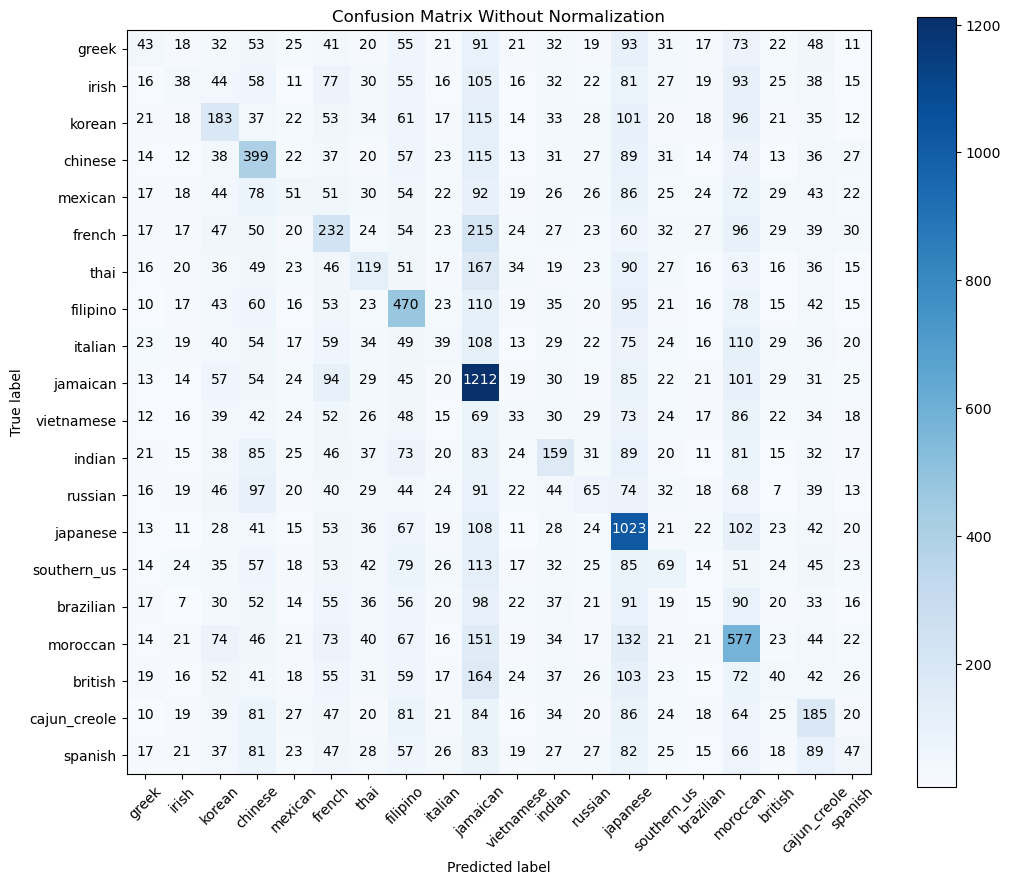

<Figure size 640x480 with 0 Axes>

In [17]:
cnf_matrix = confusion_matrix(y_test, yy_pred)
np.set_printoptions(precision=2)

# Plotting non-normalize confusion matrix
plt.figure(figsize=(12, 10))
plot_confusion_matrix(cnf_matrix, classes=class_names,
                        title='Confusion Matrix Without Normalization')
plt.show()
plt.savefig("non-normalize.png", dpi="figure")

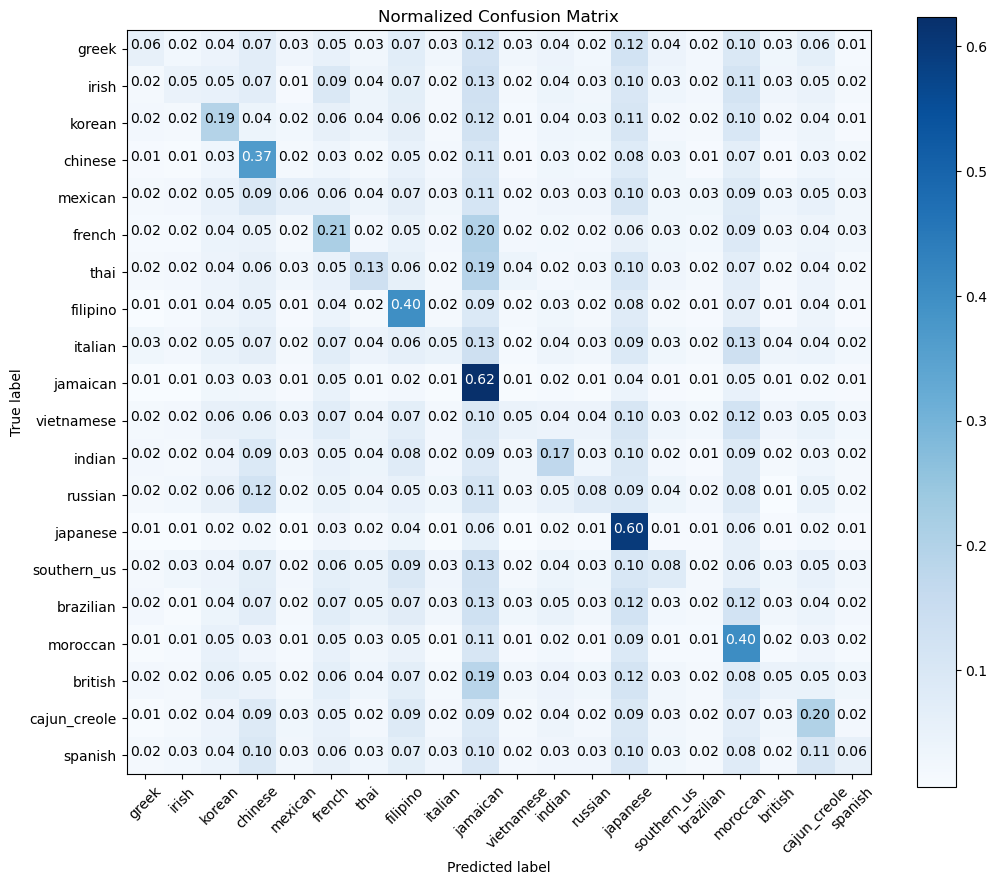

<Figure size 640x480 with 0 Axes>

In [18]:
# Plotting Normalize Confusion Matrix
plt.figure(figsize=(12, 10))
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                     title='Normalized Confusion Matrix')

plt.show()
plt.savefig("Normalized.png", dpi="figure")

##
## Thank you!
##